# Machine Learning Tutorial
    Author:    Theodora Tataru
               C00231174
    Tutor:     Greg Doyle
    Course:    Software Development, 4th year
    Institute: Institute of Technology Carlow
    Year:      2020

### This is tutorial focuses on various preprocessing data techniques and algorithms
#### Pre-processing data methods:
    1. cleaning data
    2. data inegration
    3. data reduction

#### Machine Learning Algorithms:
    1. Neural Network 
    2. Decision Tree


## Data pre-processing
This tutorial demonstrates different techniques for pre-processing data.
In this part of the tutorial, the following pre-processing methods:
    - data cleaning
        - handle missing data
        - handle noisy data
        - binning data for data smoothing
    - data integration and transformation
        - handle duplicate data
        - data integration
    - data reduction
        - cube aggregation

## Data cleaning - Missing data

### Packages needed:
    - Python 3
    - Pandas
    - NumPy
    - Scikit-Learn
### Overview
#### Dataset: Diabetes dataset
    - Diabetes Dataset
    - Has missing values: YES
    - Source: National Institute of Diabetes and Digestive Kidney Diseases
    - Date: 1990
    - Number of instances: 768
    - Number of attributes: 8+
           1. Number of times pregnant
           2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
           3. Diastolic blood pressure (mm Hg)
           4. Triceps skinfold thickness (mm)
           5. 2-Hour serum insulin (mu U/ml)
           6. Body mass index (weight in kg/(height in m)^2)
           7. Diabetes pedigree function
           8. Age (years)
           9. Class variable (0 or 1)
#### Process:
    - mark missing values
    - remove rows with missing values
    - replace missing values
    - use algorithms that support missing values

  

In [1]:
## Mark Missing values
from pandas import read_csv ## used to load the dataset
dataset = read_csv('pima-indians-diabetes.csv') ## load the data set from harddisk
print(dataset) ## print the summary of the dataset, to see missing values

      6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]


Missing data can be represented by out-of-range values. In a numeric field where values should be positive, missing data can be represented by 0 or negative numbers.

In [2]:
## usingPanda DataFrame, we can print the dataset summary statistics on each field
print(dataset.describe())

                6         148          72          35           0        33.6  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   32.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.500000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

            0.627          50           1  
count  767.000000  767.000000  767.000000  
mean     0.471674   33.219035    0.348110  
std      0.331497   11.752296    0.476682  
min      0.078000   21.000000    0.000000  
25%      0.243500   24.000000    0.000000  
50%   

As seen in the above line, there are fields that have a minimum value of zero. On some columns, the value of zero does not make sense and indicates that their values are missing.

Columns with missing values:

    1: Plasma glucose concentration
    2: Diastolic blood pressure
    3: Triceps skinfold thickness
    4: 2-Hour serum insulin
    5: Body mass index


In [3]:
## We can confirm the missing values, by analyzing the raw data. Therefore, we will print the first 10 rows of the dataset
print(dataset.head(10))

    6  148  72  35    0  33.6  0.627  50  1
0   1   85  66  29    0  26.6  0.351  31  0
1   8  183  64   0    0  23.3  0.672  32  1
2   1   89  66  23   94  28.1  0.167  21  0
3   0  137  40  35  168  43.1  2.288  33  1
4   5  116  74   0    0  25.6  0.201  30  0
5   3   78  50  32   88  31.0  0.248  26  1
6  10  115   0   0    0  35.3  0.134  29  0
7   2  197  70  45  543  30.5  0.158  53  1
8   8  125  96   0    0   0.0  0.232  54  1
9   4  110  92   0    0  37.6  0.191  30  0


To simplify things, we can print the count of the number of missing values on each column. 
For better visualization, we will mark all missing values as "True", and then, we can count the the "True" values for each column

In [4]:
dataset = read_csv('pima-indians-diabetes.csv', header=None)
## count the number of missing values from all 5 columns
missing = (dataset[[0,1,2,3,4,5,6,7,8]] == 0).sum()
print(missing)

0    111
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8    500
dtype: int64


It can be seen that columns 1, 2 and 5 has few missing value, while column 3, 4 and 8 have many missing values.
In Python, missing values are usually marked as NaN. This values Nan are ignored when operations are performed.

In [5]:
from numpy import nan
## replacing all zero values by nan in the dataset
dataset[[0,1,2,3,4,5,6,7,8]] = dataset[[0,1,2,3,4,5,6,7,8]].replace(0,nan)
print(dataset.isnull().sum())

0    111
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8    500
dtype: int64


As the sum of counting the zeros in the dayaset, matches the counting when using nan, confirms that we marked and identified the missing values correctly. 

In [6]:
## confirming that the zero values were replaced by NaN
print(dataset.head(10))

      0      1     2     3      4     5      6   7    8
0   6.0  148.0  72.0  35.0    NaN  33.6  0.627  50  1.0
1   1.0   85.0  66.0  29.0    NaN  26.6  0.351  31  NaN
2   8.0  183.0  64.0   NaN    NaN  23.3  0.672  32  1.0
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21  NaN
4   NaN  137.0  40.0  35.0  168.0  43.1  2.288  33  1.0
5   5.0  116.0  74.0   NaN    NaN  25.6  0.201  30  NaN
6   3.0   78.0  50.0  32.0   88.0  31.0  0.248  26  1.0
7  10.0  115.0   NaN   NaN    NaN  35.3  0.134  29  NaN
8   2.0  197.0  70.0  45.0  543.0  30.5  0.158  53  1.0
9   8.0  125.0  96.0   NaN    NaN   NaN  0.232  54  1.0


Having missing values in a training dataset can cause errors in the machine learning algorithms and lead to erroneous predictions.
It is essential to handle the missing data prior to developing the model and the training process.

#### Removing the missing values
The easiest and simplistic strategy to handle the missing data is to remove all records containing missing data.
To achieve this, a new Panda DataFrame can be created with the rows containing the missing values removed.
Pandas provide a function dropna(), that can be used to remove columns or rows with missing data. In our example, we will use this function to remove all wors that contain missing data.

In [7]:
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the shape of the raw data
print(dataset.shape)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(dataset.shape)

(768, 9)
(392, 9)


The output of the code above:
    - the first row shows the initial number of rows contained in the dataset
    - the second row shows the remaining number of rows that do not contain missing data.

Now that the data had been cleaned for missing values, an algorithm sensitive to missing data can be used to determine the accuracy that can be obtained with the remaining data. 
#### Latent Dirichlet Allocation (LDA) 
LDA is an unsupervised learning algorithm that views data as words and works on making a key assumption. [2]

Running this algorithm, the output might vary, given the nature of the algorithm. The algorithm should be executed a few times in a row and compute the average outcome to determine the average accuracy that the data can provide.


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.781


The approach presented above, which implies the deletion of all rows containing missing values, can limit the model's prediction. Therefore, new methods of dealing with missing values will be detailed below.

#### Impute Missing Values
This method implies the replacement of missing values, and there are many ways of replacing missing values, such as:
Replacing a missing value with:
    1. a constant value that has meaning 
    2. a random value from another record
    3. a mean, median or mode value for that column
    4. a value estimated by another predictive value
Each option presented above will have a different impact on the model, and on the predictions, the model will produce. 
Pandas, provide a function called fillna(), that replaces missing values with a specific value.
##### Replacing missing values with the mean of the column.
This function allows the developer to specify the value that replaces the missing value and the technique used to replace it.
The Pipeline is used to define the modeling pipeline, where data is primarly passed through the SimpleImputer to be transformed,  and only after fed to the model. 

In [9]:
# example of evaluating a model after an imputer transform
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# define the model
lda = LinearDiscriminantAnalysis()
# define the modeling pipeline
pipeline = Pipeline(steps=[('imputer', imputer),('model', lda)])
# define the cross validation procedure
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.762


Let's compare the accuracy from the LDA algorithm that removes the rows with missing values and the accuracy of the model that replaced the missing values with the column's mean. We can observe that accuracy had decreased.
Try replacing the missing values with other values and compare the results again. For a more detailed example of imputing missing values, check this tutorial: https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/

# Machine Learning Algorithms

## A high level understanding of machine learning algorithms

## Convolutional Neural Networks [3]

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [12]:
train_images[0,23,23]

194

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

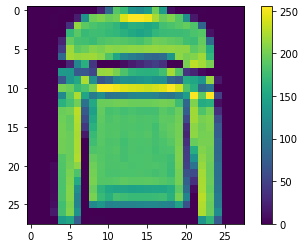

In [14]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

### Processing

Converting greyscale pixels (0-255) to be between 0-1, makes processing easier 

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

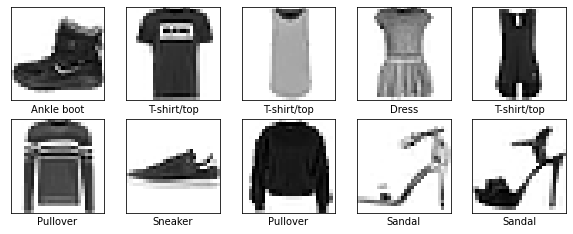

In [17]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5041 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3716 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3337 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3143 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2797 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2576 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2471 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

### Evaluating the Model

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)## Predictions

313/313 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8819
Test accuracy: 0.8819000124931335


## Predictions

In [21]:
predictions = model.predict(test_images)

In [22]:
type(predictions)
print(predictions)

[[2.2315726e-07 1.7658706e-08 1.2795811e-08 ... 2.3045668e-03
  4.1346606e-08 9.9753547e-01]
 [5.4758966e-05 3.9841182e-11 9.9850309e-01 ... 2.4946262e-17
  1.1948342e-09 5.0012029e-13]
 [1.0246761e-10 1.0000000e+00 2.4027117e-12 ... 4.5927312e-23
  6.8979013e-15 1.8838461e-16]
 ...
 [1.6769913e-05 8.8197054e-11 7.4555615e-08 ... 7.9650908e-09
  9.9988532e-01 6.0992590e-13]
 [9.6878674e-09 9.9999726e-01 2.2366806e-09 ... 1.3602097e-12
  1.6711203e-10 1.1604284e-08]
 [1.2109563e-06 4.4785300e-11 2.8242451e-07 ... 1.1418026e-03
  2.8421591e-05 1.9374495e-06]]


In [23]:
np.argmax(predictions[0])

9

Pick a number inclusive 1-1000: 1000
Expected: T-shirt/top
Guess: T-shirt/top


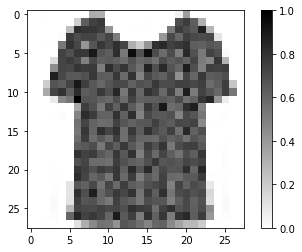

In [24]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    print("Expected: " + label)
    print("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

num = int(input("Pick a number inclusive 1-1000: "))
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


## Decision Tree Model [4]

In [25]:
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from sklearn import tree
import matplotlib.pyplot as plt

In [26]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
# flatten the images to have values between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

In [29]:
## the max depth of the tree is the number of classifiers
model = DecisionTreeClassifier(max_depth=len(class_names)-1) 

In [30]:
## flatten the images from a two-dimensional array to a one-dimensional array
## Index, X, Y
index,x,y = train_images.shape
d2_train = train_images.reshape(index, x*y)

index,x,y = test_images.shape
d2_test = test_images.reshape(index, x*y)

In [31]:
## train the model
model.fit(d2_train, train_labels)

DecisionTreeClassifier(max_depth=9)

In [32]:
## flatten the images from a two-dimensional array to a one-dimensional array
## Index, X, Y
index,x,y = train_images.shape
d2_train = train_images.reshape(index, x*y)

index,x,y = test_images.shape
d2_test = test_images.reshape(index, x*y)

In [33]:
predictions = model.predict(d2_test)

In [34]:
predictions[0]

9

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, test_labels)

0.7985

In [36]:
print(tree.export_text(model))

|--- feature_207 <= 0.03
|   |--- feature_599 <= 0.32
|   |   |--- feature_405 <= 0.05
|   |   |   |--- feature_394 <= 0.04
|   |   |   |   |--- feature_175 <= 0.03
|   |   |   |   |   |--- feature_406 <= 0.17
|   |   |   |   |   |   |--- feature_717 <= 0.26
|   |   |   |   |   |   |   |--- feature_404 <= 0.79
|   |   |   |   |   |   |   |   |--- feature_376 <= 0.90
|   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |--- feature_376 >  0.90
|   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_404 >  0.79
|   |   |   |   |   |   |   |   |--- feature_423 <= 0.31
|   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |--- feature_423 >  0.31
|   |   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |--- feature_717 >  0.26
|   |   |   |   |   |   |   |--- feature_13 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_185 <= 0.34
|   |   |   |   |   |   |   |   |   |--- class: 5

In [37]:
import matplotlib.pyplot as plt

56
Predicted: Bag
Expected: Bag


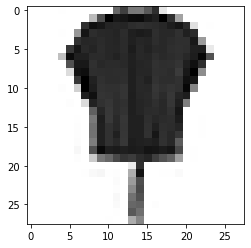

In [ ]:
while True:
    choice = int(input())
    print(f"Predicted: {class_names[predictions[choice]]}")
    print(f"Expected: {class_names[test_labels[choice]]}")
    plt .figure()
    plt.imshow(train_images[choice], cmap=plt.cm.binary)
    plt.show()

# References
    1. Jason Brownlee, 2017, "How to Handle Missing Data with Python", Available at: https://machinelearningmastery.com/handle-missing-data-python/, (Accessed 10 December 2020)

    2. Tyler Doll, 2018, "LDA Topic Modeling: An Explanation", Available at: https://towardsdatascience.com/lda-topic-modeling-an-explanation-e184c90aadcd, (Accessed 01.01.2021)
    
    3. Tenserflow, 2020, "Basic classification: Classify images of clothing", Available at: https://www.tensorflow.org/tutorials/keras/classification, (Accessed 05.01.2020)
    
    4. Theodora Tataru and Liliana O'Sullivan, 2020,  Available at: https://instituteoftechnol663-my.sharepoint.com/:b:/g/personal/c00231174_itcarlow_ie/EaPwa2jNdhxEs0FtRfYoPlABahguc5fn0Rd8gf93eeLYEw?e=r3ywIz, (Accessed 05.01.2020)